In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import CosSignal
from thinkdsp import decorate
from thinkdsp import Chirp

In [3]:
#1 What is a linear chirp signal? Write down its mathematical function

In [13]:
import numpy as np
PI2 = 2 * np.pi
ts = np.linspace(0,10,1000)
def myCHIRP(ts, f0=100, f1=400):
    freqs = np.linspace(f0, f1, len(ts))
    dts = np.diff(ts, prepend=0)
    dphis = PI2 * freqs * dts
    phases = np.cumsum(dphis)
    ys = np.cos(phases)
    return ys

In [5]:
#3 what is DFT (Discrete Fourier Transform), and IDFT (Inverse Discrete Fourier Transform), write down their mathematical definition.

In [6]:
#4 Given a time-domian sequence x[n]= [1,1,1,1], please calculate the DFT X[k]. and also compute y[n], which is the IDFT of X[k]
x = np.array([1,1,1,1])
import numpy.fft as fft
X = fft.fft(x)
print(X)
y = fft.ifft(X)
print(y)

[4.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 1.+0.j 1.+0.j 1.+0.j]


In [7]:
#4 DFT
np.set_printoptions(3)
N = 4
x = np.array([1]*N) 
n = np.arange(N).reshape(-1,1)
nk = n@n.T
X = np.exp(-1j*2*np.pi/N*nk)@x
X

array([ 4.000e+00+0.000e+00j, -1.225e-16-1.225e-16j,
        0.000e+00-2.449e-16j,  3.674e-16-3.674e-16j])

In [8]:
#4 IDFT
np.set_printoptions(3)
N = 4
x = np.array([1]*N) 
n = np.arange(N).reshape(-1,1)
nk = n@n.T
y = np.exp(1j*2*np.pi/N*nk)@X /N
y

array([1.-1.837e-16j, 1.-6.123e-17j, 1.+6.123e-17j, 1.+1.837e-16j])

In [9]:
#5 Write a function called myDft(), it can compute the DFT of any signal x[n] or the IDFT of any spectrum X[k]
def myDft(x, inverse = False):
    if inverse: 
        X = fft.fft(x,norm = "forward")
    else:
        X = fft.fft(x)
    return X

print(myDft(x,False))
print(myDft(x,True))

[4.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


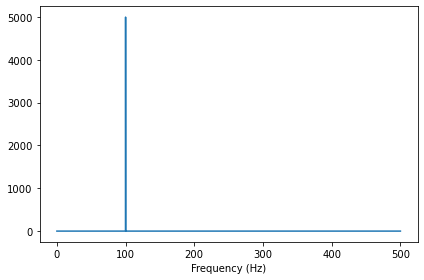

In [10]:
#6 If x is a Cosine signal with frequency = 100 Hz, generate a discrete signal with sampling frequency, Fs = 1000 samples/sec, for 10 sec. 
# compute the spectrum X[k] of the the signal x[n] and plot X[k], what does it look like?
x = CosSignal(freq=100)
x_wave = x.make_wave(duration=10, start=0, framerate=1000)

x_spectrum = x_wave.make_spectrum()
x_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [11]:
#7 What is convolution of 2 signal x[n] and y[n], please write down their mathematical definition

In [12]:
#8 If x= [1,1,1,1], y=[1,2,3,4,5], what is their convolution z = x*y?
x = np.array([1,1,1,1,0,0,0,0])
y = np.array([1,2,3,4,5,0,0,0])
np.convolve(x,y)

array([ 1,  3,  6, 10, 14, 12,  9,  5,  0,  0,  0,  0,  0,  0,  0])

In [13]:
#9 Write a function called myConvlution(), which can compute the convolution of two signal.
def myConvolution(x,y):
    z = np.zeros(np.size(x))
    for i in range(np.size(x)):
        for j in range(np.size(x)):
            z[i] = z[i] + (x[j]*y[i-j])
    return z
myConvolution(x,y)

array([ 1.,  3.,  6., 10., 14., 12.,  9.,  5.])

In [14]:
#10 What is the convolution theorem?
# The Fourier transform of a convolution of two functions(or signals) is the pointwise product of their Fourier transforms
# DFT(f ∗ g) = DFT(f) · DFT(g) where f is a wave array and g is a window.
# if we convolve f and g, and then compute the DFT, we get the same answer as computing the DFT of f and g, and then multiplying the results element-wise.

In [15]:
#11 Verify the convolution theorem by using myDft() and myConvolution()
x = np.array([1,1,1,1,0,0,0,0])
y = np.array([1,2,3,4,5,0,0,0])
xy_cond = myDft(myConvolution(x,y))
print(xy_cond)
print(myDft(x)*myDft(y))

[ 60.   +0.j    -22.899+5.828j   0.   +0.j     -3.101-0.172j
   0.   +0.j     -3.101+0.172j   0.   +0.j    -22.899-5.828j]
[ 60.   +0.j    -22.899+5.828j   0.   +0.j     -3.101-0.172j
   0.   +0.j     -3.101+0.172j   0.   +0.j    -22.899-5.828j]
